In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os
import seaborn as sns

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

2025-01-26 11:53:02.047979: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-26 11:53:02.064905: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737892382.085191     217 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737892382.091304     217 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-26 11:53:02.111613: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
 #EDA

In [3]:
base_dir = './capstone-project'

In [4]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [5]:
def num_of_classes(folder_dir, folder_name) :
    classes = [class_name for class_name in os.listdir(train_dir)]
    print(f'number of classes in {folder_name} folder : {len(classes)}')

In [6]:
num_of_classes(train_dir, 'train')
num_of_classes(validation_dir, 'validation')
num_of_classes(test_dir, 'test')

number of classes in train folder : 27
number of classes in validation folder : 27
number of classes in test folder : 27


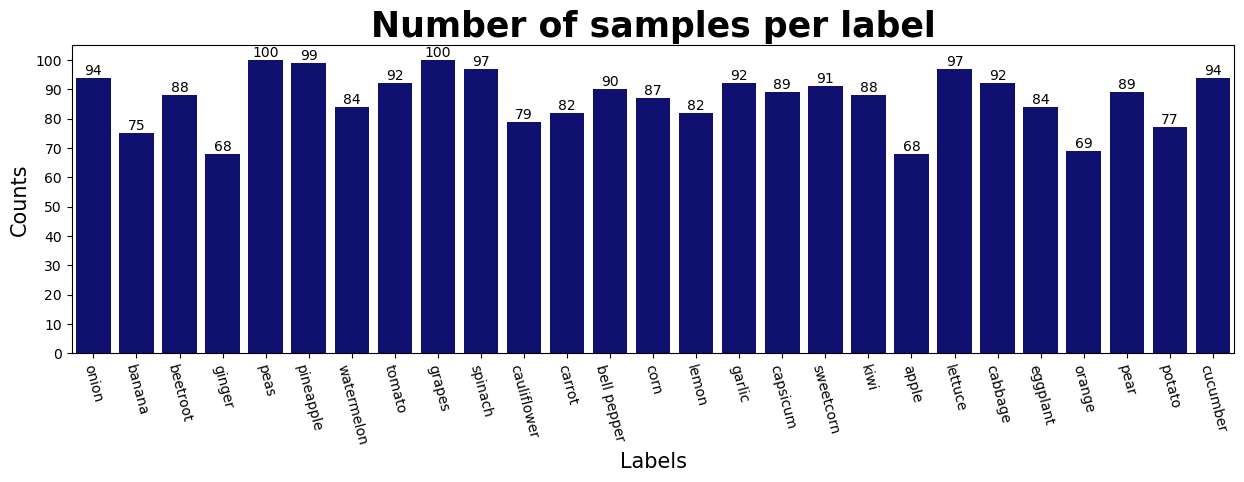

In [7]:
classes = [class_name for class_name in os.listdir(train_dir)]
count = []
for class_name in classes :
    count.append(len(os.listdir(os.path.join(train_dir, class_name))))

plt.figure(figsize=(15, 4))
ax = sns.barplot(x=classes, y=count, color='navy')
plt.xticks(rotation=285)
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Number of samples per label', fontsize=25, fontweight='bold')
plt.xlabel('Labels', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.yticks(np.arange(0, 105, 10))
plt.show()

In [8]:
#balanced set

In [9]:
#getting glimpse into dataset
all_classes = os.listdir(base_dir+ "/train/")

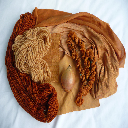

In [10]:
import random
random_img = random.choice(os.listdir(base_dir+ "/train/"+ all_classes[0]))
random_img_path = os.path.join(base_dir+ "/train/" + all_classes[0] + "//" + random_img)
load_img(random_img_path, target_size=(128,128))

In [11]:
all_classes

['onion',
 'banana',
 'beetroot',
 'ginger',
 'peas',
 'pineapple',
 'watermelon',
 'tomato',
 'grapes',
 'spinach',
 'cauliflower',
 'carrot',
 'bell pepper',
 'corn',
 'lemon',
 'garlic',
 'capsicum',
 'sweetcorn',
 'kiwi',
 'apple',
 'lettuce',
 'cabbage',
 'eggplant',
 'orange',
 'pear',
 'potato',
 'cucumber']

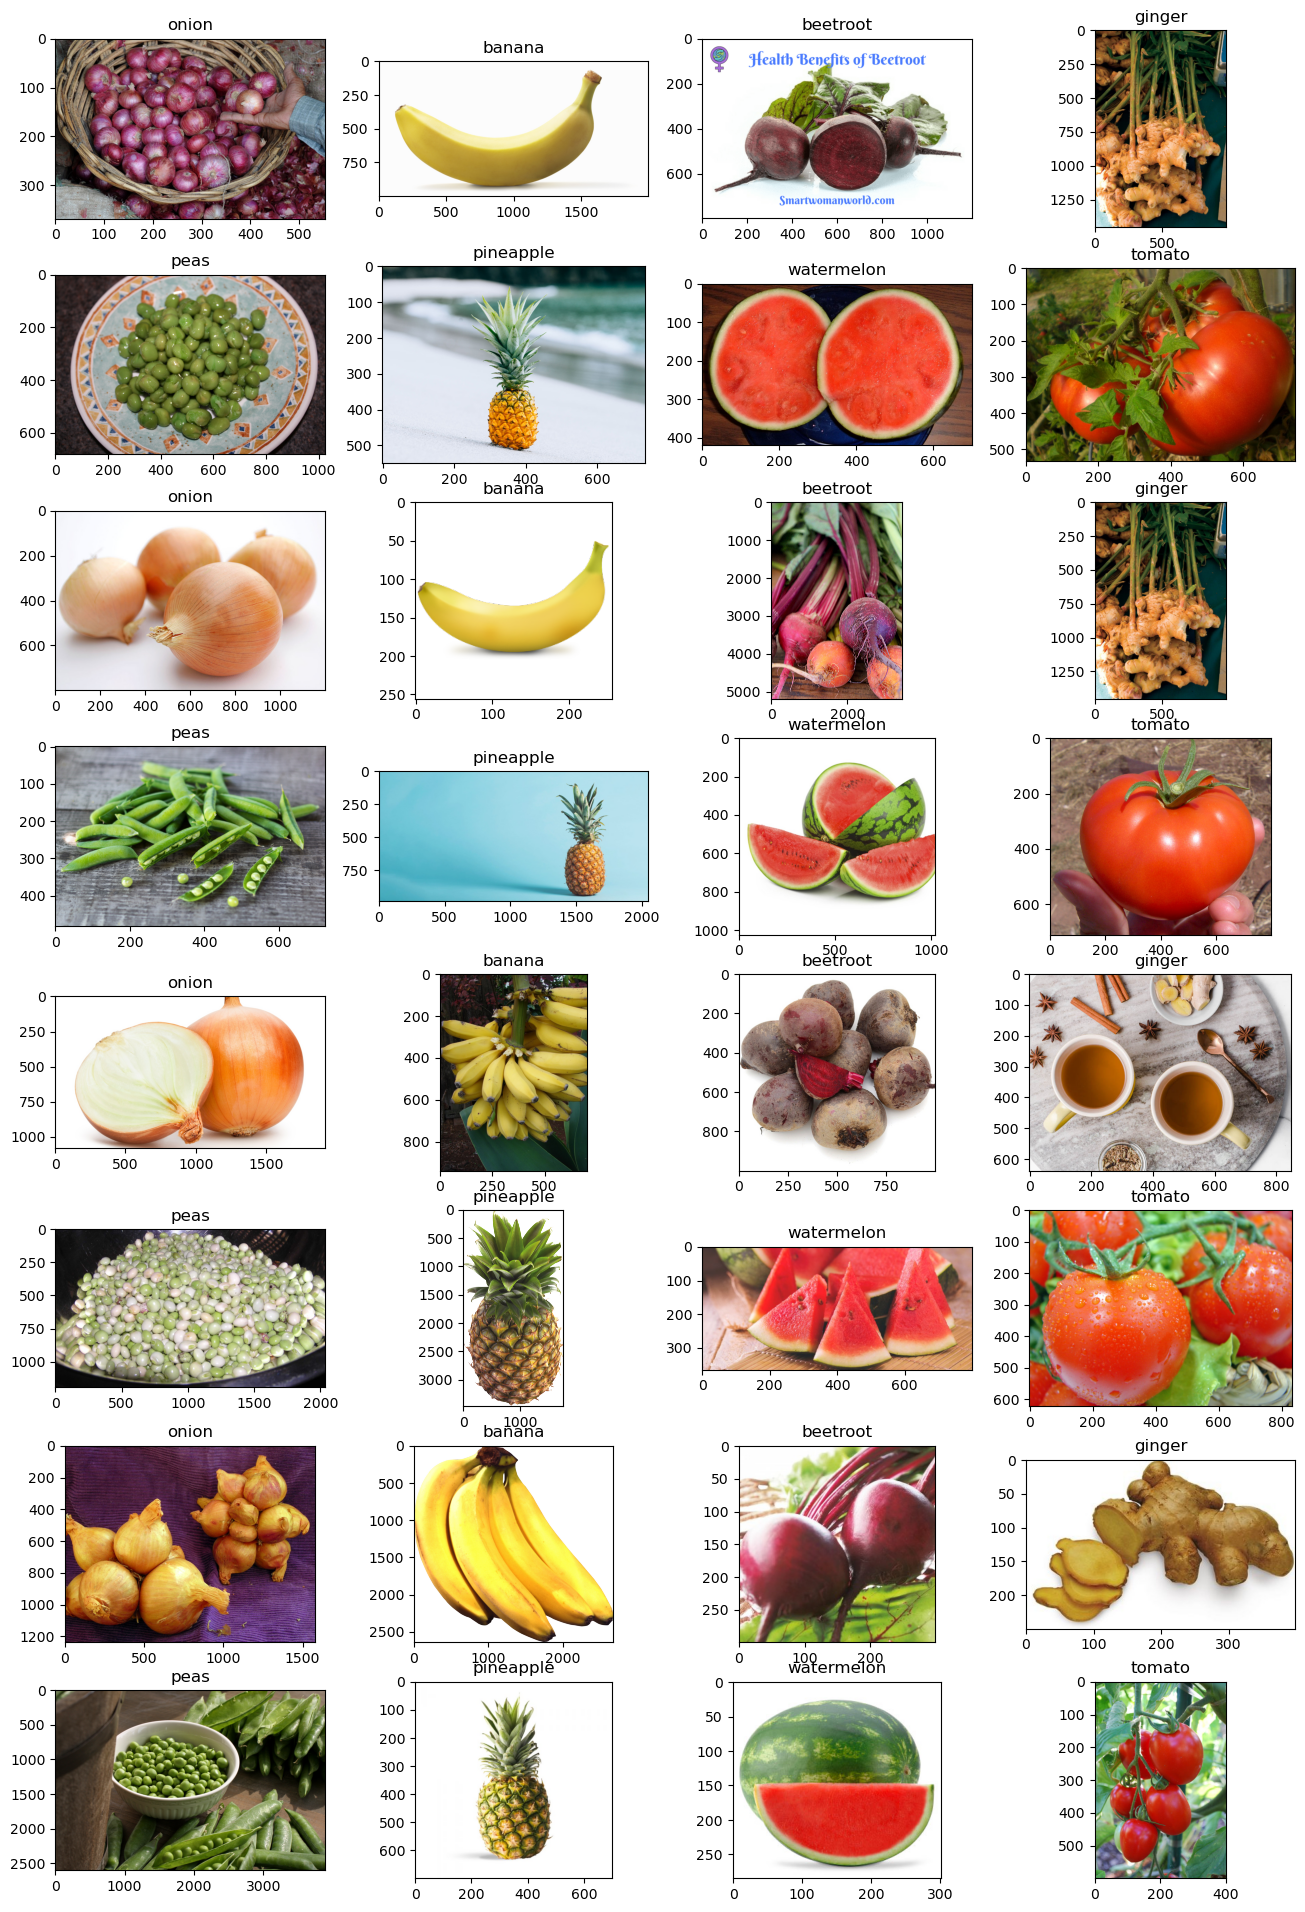

In [12]:
fig, axs = plt.subplots (nrows = 8, ncols = 4, figsize=(16,24))

class_num = 0 
for XX, ax in enumerate(fig.axes): #32
    class_num = ( 0 if class_num>7 else class_num ) #set a condition so it wont go bigger than class size
    random_img = random.choice(os.listdir(base_dir+ "/train/"+ all_classes[class_num]))
    random_img_path = os.path.join(base_dir+ "/train/" + all_classes[class_num] + "/" + random_img)
    ax.imshow(plt.imread(random_img_path))
    ax.set_title(all_classes[class_num])
    class_num+=1

In [14]:
#looking good all the random images match the titles

In [15]:
#Model selection:

In [16]:
#Xception
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input

In [17]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './capstone-project/train',
    target_size=(150, 150),
    batch_size=32
)

Found 2347 images belonging to 27 classes.


In [18]:
train_ds.class_indices

{'apple': 0,
 'banana': 1,
 'beetroot': 2,
 'bell pepper': 3,
 'cabbage': 4,
 'capsicum': 5,
 'carrot': 6,
 'cauliflower': 7,
 'corn': 8,
 'cucumber': 9,
 'eggplant': 10,
 'garlic': 11,
 'ginger': 12,
 'grapes': 13,
 'kiwi': 14,
 'lemon': 15,
 'lettuce': 16,
 'onion': 17,
 'orange': 18,
 'pear': 19,
 'peas': 20,
 'pineapple': 21,
 'potato': 22,
 'spinach': 23,
 'sweetcorn': 24,
 'tomato': 25,
 'watermelon': 26}

In [19]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './capstone-project/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 264 images belonging to 27 classes.


In [23]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False



inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(27)(vectors)

model = keras.Model(inputs, outputs)

In [24]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [25]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


I0000 00:00:1737895385.485047    2416 service.cc:148] XLA service 0x7f3bac016cc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1737895385.485091    2416 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2025-01-26 12:43:05.614475: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1737895386.323557    2416 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-01-26 12:43:09.176633: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.4 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


 1/74 ━━━━━━━━━━━━━━━━━━━━ 10:45 9s/step - accuracy: 0.0000e+00 - loss: 3.4610

I0000 00:00:1737895390.073396    2416 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


74/74 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.5198 - loss: 2.2007 - val_accuracy: 0.8561 - val_loss: 0.7957
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 64s 866ms/step - accuracy: 0.8227 - loss: 0.9758 - val_accuracy: 0.8864 - val_loss: 0.4605
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 63s 855ms/step - accuracy: 0.9096 - loss: 0.3316 - val_accuracy: 0.9242 - val_loss: 0.3629
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 84s 882ms/step - accuracy: 0.9348 - loss: 0.2323 - val_accuracy: 0.9508 - val_loss: 0.2083
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 64s 866ms/step - accuracy: 0.9491 - loss: 0.1767 - val_accuracy: 0.9545 - val_loss: 0.2749
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 65s 888ms/step - accuracy: 0.9733 - loss: 0.1021 - val_accuracy: 0.9583 - val_loss: 0.1772
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 63s 856ms/step - accuracy: 0.9750 - loss: 0.0910 - val_accuracy: 0.9697 - val_loss: 0.2530
Epoch 8/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 65s 875ms/step - accuracy: 0.9839 - loss: 0.0579 - val_accuracy: 0.9697 -

Text(0.5, 1.0, 'Training acc vs Validation acc')

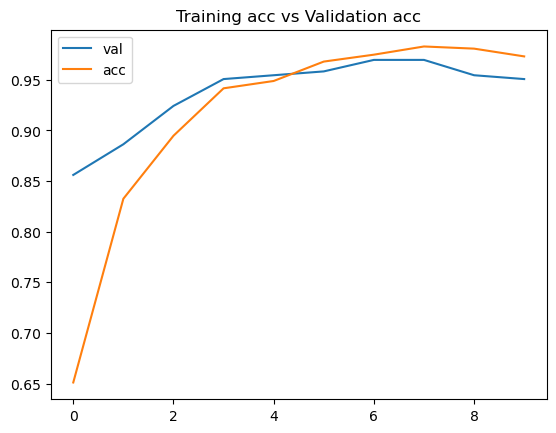

In [27]:
plt.plot(history.history['val_accuracy'], label=('val'))
plt.plot(history.history['accuracy'], label=('acc'))
plt.legend()
plt.title('Training acc vs Validation acc')

In [28]:
#adding inner layers
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False
inputs = keras.Input(shape=(150, 150, 3))
base = base_model(inputs, training=False)
vectors = keras.layers.GlobalAveragePooling2D()(base)
inner = keras.layers.Dense(500, activation='relu')(vectors)
inner2 = keras.layers.Dense(250, activation='relu')(inner)
outputs = keras.layers.Dense(27,  activation='softmax')(inner2)
model = keras.Model(inputs, outputs)

In [29]:
optimizer = keras.optimizers.Adam()
loss = keras.losses.CategoricalCrossentropy()
model.compile(optimizer = optimizer, loss = loss, metrics=['accuracy'])

In [30]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 75s 927ms/step - accuracy: 0.5028 - loss: 1.7935 - val_accuracy: 0.8485 - val_loss: 0.4396
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 63s 850ms/step - accuracy: 0.8226 - loss: 0.5466 - val_accuracy: 0.9091 - val_loss: 0.3004
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 64s 865ms/step - accuracy: 0.8838 - loss: 0.3264 - val_accuracy: 0.9242 - val_loss: 0.2703
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 61s 830ms/step - accuracy: 0.9270 - loss: 0.2129 - val_accuracy: 0.9280 - val_loss: 0.1970
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 62s 826ms/step - accuracy: 0.9408 - loss: 0.1598 - val_accuracy: 0.9091 - val_loss: 0.2787
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 62s 845ms/step - accuracy: 0.9462 - loss: 0.1551 - val_accuracy: 0.9470 - val_loss: 0.2249
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 65s 873ms/step - accuracy: 0.9755 - loss: 0.0762 - val_accuracy: 0.9508 - val_loss: 0.1562
Epoch 8/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 64s 868ms/step - accuracy: 0.9701 - loss: 0.0706 - val_accu

Text(0.5, 1.0, 'Training acc vs Validation acc')

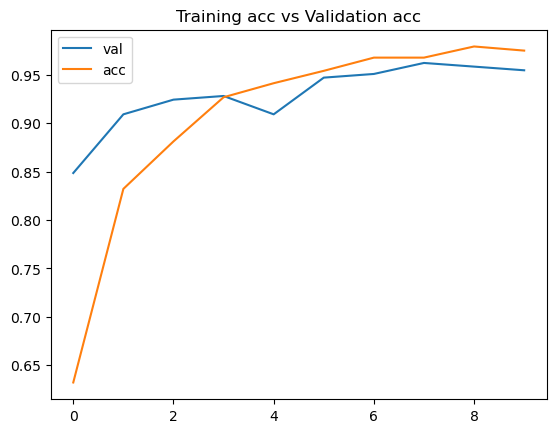

In [31]:
plt.plot(history.history['val_accuracy'], label=('val'))
plt.plot(history.history['accuracy'], label=('acc'))
plt.legend()
plt.title('Training acc vs Validation acc')

In [32]:
#VGG16 Model, with additional inner layers

In [33]:
from tensorflow.keras.applications.vgg16 import VGG16

In [34]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './capstone-project/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './capstone-project/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 2347 images belonging to 27 classes.
Found 264 images belonging to 27 classes.


In [38]:
base_model= VGG16(weights='imagenet', include_top= False, input_shape=(150, 150, 3))
base_model.trainable = False

##################################################
inputs = keras.Input(shape=(150, 150, 3))   
base = base_model(inputs, training= False)
vectors = keras.layers.GlobalAveragePooling2D()(base)
inner = keras.layers.Dense(100, activation= 'relu')(vectors) 
outputs = keras.layers.Dense(27, activation='softmax')(inner) 
model = keras.Model(inputs, outputs)
##################################################

optimizer = keras.optimizers.Adam()
loss = keras.losses.CategoricalCrossentropy()
model.compile(
    optimizer=optimizer, 
    loss = loss, 
    metrics=['accuracy']
)

In [39]:
history = model.fit(train_ds, epochs=10, validation_data = val_ds)

Epoch 1/10


2025-01-26 13:22:35.778145: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,64,150,150]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,150,150]{3,2,1,0}, f32[64,3,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-01-26 13:22:35.868832: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,64,150,150]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,64,150,150]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasAct

20/74 ━━━━━━━━━━━━━━━━━━━━ 37s 687ms/step - accuracy: 0.0527 - loss: 3.3519

2025-01-26 13:22:55.050874: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[11,64,150,150]{3,2,1,0}, u8[0]{0}) custom-call(f32[11,3,150,150]{3,2,1,0}, f32[64,3,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-01-26 13:22:55.111647: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[11,64,150,150]{3,2,1,0}, u8[0]{0}) custom-call(f32[11,64,150,150]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasAct

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 766ms/step - accuracy: 0.1395 - loss: 3.1166

2025-01-26 13:23:49.219025: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[8,64,150,150]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,3,150,150]{3,2,1,0}, f32[64,3,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-01-26 13:23:49.268609: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[8,64,150,150]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,64,150,150]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivat

74/74 ━━━━━━━━━━━━━━━━━━━━ 78s 956ms/step - accuracy: 0.1411 - loss: 3.1126 - val_accuracy: 0.5795 - val_loss: 1.9950
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 66s 884ms/step - accuracy: 0.5435 - loss: 1.9841 - val_accuracy: 0.7576 - val_loss: 1.1857
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 65s 878ms/step - accuracy: 0.6572 - loss: 1.4378 - val_accuracy: 0.7803 - val_loss: 0.8818
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 66s 889ms/step - accuracy: 0.7196 - loss: 1.1100 - val_accuracy: 0.8182 - val_loss: 0.6957
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 66s 893ms/step - accuracy: 0.7487 - loss: 0.9694 - val_accuracy: 0.8788 - val_loss: 0.5613
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 65s 875ms/step - accuracy: 0.7794 - loss: 0.8361 - val_accuracy: 0.8788 - val_loss: 0.5071
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 65s 877ms/step - accuracy: 0.7939 - loss: 0.7627 - val_accuracy: 0.8788 - val_loss: 0.4423
Epoch 8/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 68s 922ms/step - accuracy: 0.8146 - loss: 0.6844 - val_accuracy: 0.912

Text(0.5, 1.0, 'Train accuracy vs Val accuracy')

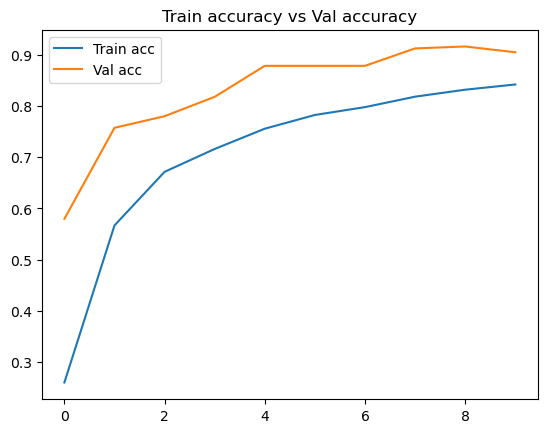

In [40]:
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.legend()
plt.title('Train accuracy vs Val accuracy')


In [41]:
#Not sure about Val being greater than Train accuracy, we will proceed with tuning the XCeption model

In [45]:
#adjusting the learning rate
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(27)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [46]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 75s 940ms/step - accuracy: 0.0826 - loss: 3.2787 - val_accuracy: 0.3939 - val_loss: 2.4020
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 65s 876ms/step - accuracy: 0.4144 - loss: 2.2772 - val_accuracy: 0.6477 - val_loss: 1.6755
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 65s 881ms/step - accuracy: 0.6156 - loss: 1.6968 - val_accuracy: 0.7462 - val_loss: 1.2439
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 65s 873ms/step - accuracy: 0.7022 - loss: 1.3314 - val_accuracy: 0.8144 - val_loss: 0.9787
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 68s 913ms/step - accuracy: 0.7564 - loss: 1.0984 - val_accuracy: 0.8447 - val_loss: 0.8120
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 64s 868ms/step - accuracy: 0.7700 - loss: 0.9827 - val_accuracy: 0.8523 - val_loss: 0.7011
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 67s 908ms/step - accuracy: 0.8087 - loss: 0.8514 - val_accuracy: 0.8636 - val_loss: 0.6189
Epoch 8/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 65s 870ms/step - accuracy: 0.8087 - loss: 0.8058 - v

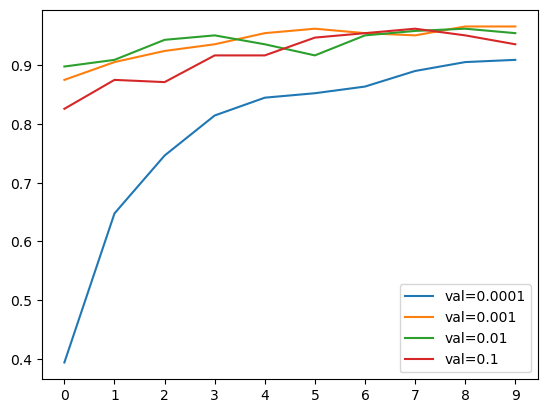

In [47]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [48]:
#We can see that learning rate of 0.001 is the best one to use

In [49]:
#adding and tuning more layers
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(27)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [50]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 75s 936ms/step - accuracy: 0.0969 - loss: 3.1485 - val_accuracy: 0.2462 - val_loss: 2.4447
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 64s 862ms/step - accuracy: 0.2807 - loss: 2.3984 - val_accuracy: 0.3939 - val_loss: 1.8937
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 65s 880ms/step - accuracy: 0.4136 - loss: 1.8985 - val_accuracy: 0.6174 - val_loss: 1.3364
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 65s 880ms/step - accuracy: 0.5866 - loss: 1.4525 - val_accuracy: 0.7273 - val_loss: 0.9118
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 82s 871ms/step - accuracy: 0.6860 - loss: 1.0999 - val_accuracy: 0.8106 - val_loss: 0.6664
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 65s 879ms/step - accuracy: 0.7644 - loss: 0.8133 - val_accuracy: 0.8220 - val_loss: 0.5388
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 65s 876ms/step - accuracy: 0.7990 - loss: 0.7261 - val_accuracy: 0.8712 - val_loss: 0.4373
Epoch 8/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 65s 874ms/step - accuracy: 0.8408 - loss: 0.6247 - val_a

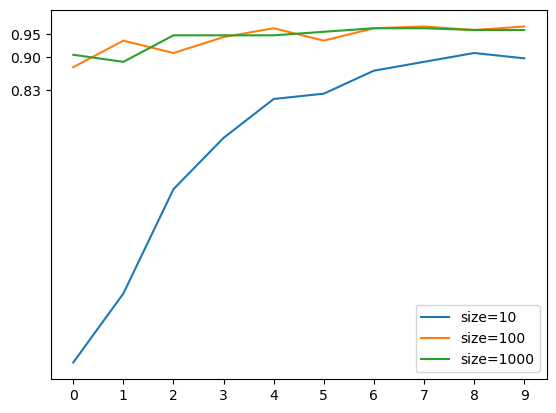

In [52]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('size=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.83, 0.90, 0.95])
plt.legend()

In [53]:
#we will go with size 1000 since ti achieves optimum level of accuracy the fastest

In [54]:
#Tuning the dropout
def make_model(learning_rate=0.01, size_inner=1000, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(27)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [56]:
learning_rate = 0.001
size = 1000

scores = {}

for droprate in [0.0, 0.4, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=12, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/12
74/74 ━━━━━━━━━━━━━━━━━━━━ 74s 913ms/step - accuracy: 0.5112 - loss: 1.7677 - val_accuracy: 0.9129 - val_loss: 0.2763
Epoch 2/12
74/74 ━━━━━━━━━━━━━━━━━━━━ 63s 849ms/step - accuracy: 0.8820 - loss: 0.3836 - val_accuracy: 0.9129 - val_loss: 0.2329
Epoch 3/12
74/74 ━━━━━━━━━━━━━━━━━━━━ 63s 849ms/step - accuracy: 0.9242 - loss: 0.2336 - val_accuracy: 0.9356 - val_loss: 0.2024
Epoch 4/12
74/74 ━━━━━━━━━━━━━━━━━━━━ 64s 864ms/step - accuracy: 0.9425 - loss: 0.1692 - val_accuracy: 0.9356 - val_loss: 0.1861
Epoch 5/12
74/74 ━━━━━━━━━━━━━━━━━━━━ 63s 847ms/step - accuracy: 0.9594 - loss: 0.1186 - val_accuracy: 0.9583 - val_loss: 0.1410
Epoch 6/12
74/74 ━━━━━━━━━━━━━━━━━━━━ 63s 850ms/step - accuracy: 0.9707 - loss: 0.0851 - val_accuracy: 0.9583 - val_loss: 0.1345
Epoch 7/12
74/74 ━━━━━━━━━━━━━━━━━━━━ 62s 843ms/step - accuracy: 0.9768 - loss: 0.0571 - val_accuracy: 0.9659 - val_loss: 0.1208
Epoch 8/12
74/74 ━━━━━━━━━━━━━━━━━━━━ 62s 848ms/step - accuracy: 0.9836 - loss: 0.0510 - val_

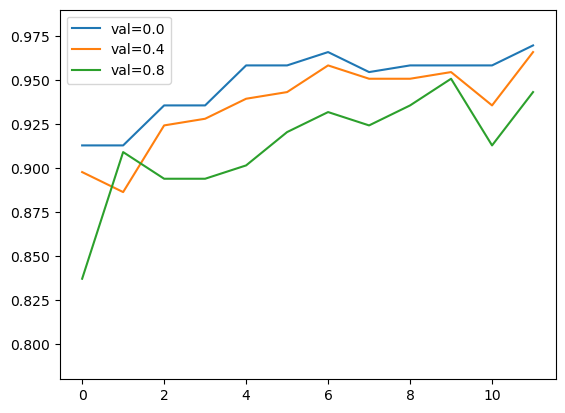

In [57]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78, 0.99)
plt.legend()

In [58]:
#clearly, droprate of 0.0 gives the best result

In [59]:
#We will now see if simple data augmentation gives us an even better model, accuracy to beat is around 9.60

In [62]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './capstone-project/train',
    target_size=(150, 150),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './capstone-project/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 2347 images belonging to 27 classes.
Found 264 images belonging to 27 classes.


In [63]:
learning_rate = 0.001
size = 1000
droprate = 0.0

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.4919 - loss: 1.8265 - val_accuracy: 0.7841 - val_loss: 0.6191
Epoch 2/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 74s 989ms/step - accuracy: 0.7671 - loss: 0.7316 - val_accuracy: 0.8902 - val_loss: 0.3329
Epoch 3/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 74s 989ms/step - accuracy: 0.8165 - loss: 0.5470 - val_accuracy: 0.8712 - val_loss: 0.3402
Epoch 4/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 74s 997ms/step - accuracy: 0.8172 - loss: 0.5017 - val_accuracy: 0.8977 - val_loss: 0.3160
Epoch 5/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 74s 993ms/step - accuracy: 0.8549 - loss: 0.4110 - val_accuracy: 0.8977 - val_loss: 0.2427
Epoch 6/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 73s 992ms/step - accuracy: 0.8655 - loss: 0.3809 - val_accuracy: 0.9015 - val_loss: 0.2933
Epoch 7/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 73s 994ms/step - accuracy: 0.8753 - loss: 0.3333 - val_accuracy: 0.9318 - val_loss: 0.2222
Epoch 8/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.8799 - loss: 0.3327 - val_accuracy: 

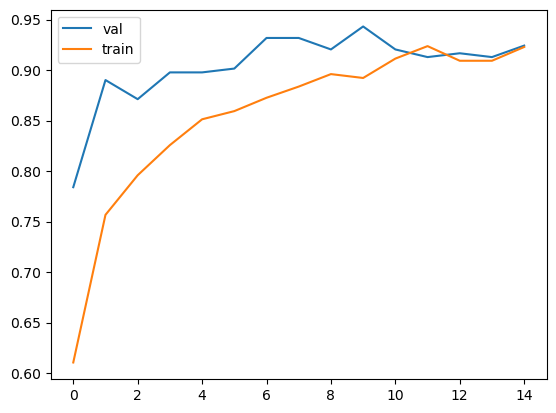

In [64]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

In [65]:
#not much improvement so we can drop the augmentation. We will now train a larger model and keep the best one using checkpointing

In [73]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(27)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [74]:
input_size = 299
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

train_ds = train_gen.flow_from_directory(
    './capstone-project/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './capstone-project/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 2347 images belonging to 27 classes.
Found 264 images belonging to 27 classes.


In [75]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [76]:
learning_rate = 0.001
size = 1000
droprate = 0.0

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=20, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/20


2025-01-26 16:35:42.323433: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 17.43GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


17/74 ━━━━━━━━━━━━━━━━━━━━ 44s 788ms/step - accuracy: 0.3272 - loss: 2.4506

2025-01-26 16:36:02.414837: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 16.95GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 860ms/step - accuracy: 0.5990 - loss: 1.4249

2025-01-26 16:37:04.174888: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 16.88GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


74/74 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.6009 - loss: 1.4172 - val_accuracy: 0.8977 - val_loss: 0.2299
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 67s 902ms/step - accuracy: 0.9020 - loss: 0.2620 - val_accuracy: 0.9470 - val_loss: 0.1558
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 70s 947ms/step - accuracy: 0.9367 - loss: 0.1603 - val_accuracy: 0.9432 - val_loss: 0.1702
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 68s 903ms/step - accuracy: 0.9440 - loss: 0.1342 - val_accuracy: 0.9545 - val_loss: 0.1224
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 68s 923ms/step - accuracy: 0.9555 - loss: 0.1095 - val_accuracy: 0.9356 - val_loss: 0.1411
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 68s 922ms/step - accuracy: 0.9567 - loss: 0.0943 - val_accuracy: 0.9621 - val_loss: 0.1273
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 68s 923ms/step - accuracy: 0.9670 - loss: 0.0846 - val_accuracy: 0.9583 - val_loss: 0.1191
Epoch 8/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 68s 911ms/step - accuracy: 0.9762 - loss: 0.0619 - val_accuracy: 0.9545 -

In [ ]:
#We sill use the best model with val accuracy of .97